In [1]:
from stepmix.stepmix import StepMix
import pandas as pd
import numpy as np

from sklearn.model_selection import GridSearchCV, ParameterGrid

import matplotlib.pyplot as plt
import seaborn as sns

import pickle as pkl

In [126]:
df = pd.read_csv("../data/cleaned_data_SYMPTOMS_9_13_23.csv", index_col=0)
sympdf = df.loc[:, df.columns.str.startswith('Symptom_')]
sympdf.shape
# filter to match
sympdf = sympdf.loc[:, (sympdf.sum() / sympdf.shape[0] > 0.05) & (sympdf.sum()  / sympdf.shape[0]< 0.95)]

In [125]:
def load_run(n_components, date):
    clusters = pd.read_csv("output/cluster_"+str(n_components)+"_"+date+".csv", index_col=0)
    mm = pd.read_csv("output/stepmix_"+str(n_components)+"_"+date+"_mmdf.csv", index_col=0)
    symp_unusual = pd.read_csv("output/stepmix_"+str(n_components)+"_"+date+"_symp_unusual.csv", index_col=0)

    file_path = "output/stepmix_"+str(n_components)+"_"+date+".pkl"

    with open(file_path, 'rb') as file:
        model = pkl.load(file)
    return({"clusters": clusters, "mm": mm, "symp_unusual": symp_unusual, "model": model})

In [25]:
n_components = 13
date = "111023"

clusters = pd.read_csv("output/cluster_"+str(n_components)+"_"+date+".csv", index_col=0)
mm = pd.read_csv("output/stepmix_"+str(n_components)+"_"+date+"_mmdf.csv", index_col=0)
symp_unusual = pd.read_csv("output/stepmix_"+str(n_components)+"_"+date+"_symp_unusual.csv", index_col=0)

file_path = "output/stepmix_"+str(n_components)+"_"+date+".pkl"

with open(file_path, 'rb') as file:
    model = pkl.load(file)

In [9]:
df["clusters"] = clusters

In [ ]:
# naming based on eyeballing mm and symp_unusual
# starting with 13 components
# 0: "sleep and temperature disturbance",
# 1: "muscle, sensory, and cognitive"

In [14]:
# calculate silhouette score
from sklearn.metrics import silhouette_score
silhouette_score(sympdf, clusters)

/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-0.024888028749080537

In [15]:
n_components = 11
date = "111023"

clusters = pd.read_csv("output/cluster_"+str(n_components)+"_"+date+".csv", index_col=0)
mm = pd.read_csv("output/stepmix_"+str(n_components)+"_"+date+"_mmdf.csv", index_col=0)
symp_unusual = pd.read_csv("output/stepmix_"+str(n_components)+"_"+date+"_symp_unusual.csv", index_col=0)

file_path = "output/stepmix_"+str(n_components)+"_"+date+".pkl"

with open(file_path, 'rb') as file:
    model = pkl.load(file)

In [16]:
silhouette_score(sympdf, clusters)

/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-0.024414097493497336

In [17]:
n_components = 9
date = "111023"

clusters = pd.read_csv("output/cluster_"+str(n_components)+"_"+date+".csv", index_col=0)
mm = pd.read_csv("output/stepmix_"+str(n_components)+"_"+date+"_mmdf.csv", index_col=0)
symp_unusual = pd.read_csv("output/stepmix_"+str(n_components)+"_"+date+"_symp_unusual.csv", index_col=0)

file_path = "output/stepmix_"+str(n_components)+"_"+date+".pkl"

with open(file_path, 'rb') as file:
    model = pkl.load(file)

In [18]:
silhouette_score(sympdf, clusters)

/Users/tessa/miniforge3/envs/stepmix/lib/python3.12/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-0.0274185285692256

In [ ]:
# silhuoette follows BIC: 11 and 13 are mostly equivalent, 9 is definitely worse
# all of them are objectively terrible though! maybe a data import issue?

In [105]:
# try loading the actual model and figure out how to extract the probabilities for each patient and class
n_components = 13
date = "111023"

clusters = pd.read_csv("output/cluster_"+str(n_components)+"_"+date+".csv", index_col=0)
mm = pd.read_csv("output/stepmix_"+str(n_components)+"_"+date+"_mmdf.csv", index_col=0)
symp_unusual = pd.read_csv("output/stepmix_"+str(n_components)+"_"+date+"_symp_unusual.csv", index_col=0)

file_path = "output/stepmix_"+str(n_components)+"_"+date+".pkl"

with open(file_path, 'rb') as file:
    model = pkl.load(file)

In [106]:
sympdf = sympdf.loc[:, (sympdf.sum() / sympdf.shape[0] > 0.05) & (sympdf.sum()  / sympdf.shape[0]< 0.95)]

In [107]:
preddf = pd.DataFrame(model.predict_proba(sympdf), index=sympdf.index)

In [108]:
preddf
# 5923 patients uniquely assignable to a cluster
# 108 poorly fitting patients
# should probably be removed from analysis 
preddf[preddf > 0.5].notna().sum(axis=1).value_counts()

1    5923
0     108
Name: count, dtype: int64

In [109]:
poor_fits = preddf[preddf[preddf > 0.5].notna().sum(axis=1) == 0].index.values

In [110]:
poor_fits

array([   82,   224,   260,   404,   450,   458,   470,   503,   537,
         541,   604,   985,   986,  1085,  1098,  1131,  1183,  1249,
        1313,  1438,  1453,  1468,  1496,  1622,  1671,  1708,  1722,
        1771,  1788,  1838,  1931,  1935,  1947,  1993,  2031,  2075,
        2095,  2195,  2304,  2326,  2365,  2398,  2433,  3215,  3217,
        3272,  3515,  3737,  3783,  3848,  3951,  4079,  4092,  4464,
        4491,  4502,  4525,  4716,  4853,  4979,  5030,  5116,  5167,
        5280,  5514,  6732,  6827,  6934,  7707,  7737,  7984,  8038,
        8324,  8579,  8633,  8838,  8947,  9002,  9147,  9283,  9895,
       10104, 10217, 10629, 10693, 10800, 10801, 10820, 10922, 11003,
       11416, 11484, 11609, 11779, 11813, 12207, 12281, 12523, 12552,
       12607, 12719, 12829, 13276, 13457, 13488, 13658, 13812, 13944])

In [118]:
clusters.loc[clusters.index.isin(poor_fits),'cluster']= np.nan

In [83]:
# remove the poor fits from df
#df = df[~df.index.isin(poor_fits)]

In [119]:
df["cluster"] = clusters

<Axes: xlabel='cluster'>

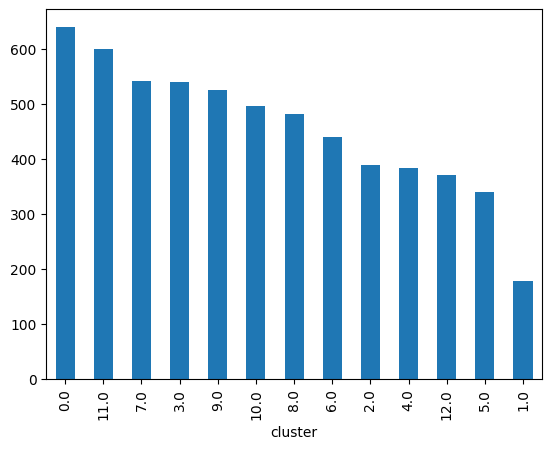

In [120]:
df["cluster"].value_counts().plot(kind="bar")
# 1 is now really small
# in a way that maybe suggests too many clusters...

In [122]:
df['cluster'].to_csv("output/cluster_13_ambiguousNaN_111023.csv")
